## Sensitivity, accuracy, errors, and repeatability ##

__Linear approximation of nonlinear transfer function__. The response of a temperature sensor is given as

$$R(T)=R_{0}e^{\beta(\frac{1}{T}-\frac{1}{T_{0}})}$$

where $R_{0}$ is the resistance of the sensor at temperature $T_{0}$ and $\beta$ is a constant that depends on the material of the sensor. $T_{0}$=20 ºC. Temperatures $T$ and $T_{0}$ are in K. Given: R(T)=1000 $\Omega$ at 25 ºC and 3000 $\Omega$ at 0 ºC. The sensor is intended for use between  -45 ºC and 120 ºC.


a. Evaluate $\beta$ for this sensor and plot the sensor transfer function for the intended span.

b. Approximate the transfer function as a straight line connecting the end points and calculate the maximum error expected as a percentage of full scale.

c. Approximate the transfer function as a linear least squares approximation and calculate the maximum error expected as a percentage of full scale.
#### Solution ####

a. Evaluate $\beta$ for this sensor and plot the sensor transfer function for the intended span.

From the two known points

1.  $R_1= 3000\, \Omega$, $T_1= 273.15\, \text{K}$.

2.  $R_2= 1000\, \Omega$, $T_2= 298.15\, \text{K}$.

From the general equation and the points,

$$R_{0}= \frac{R_{1}}{e^{\beta(\frac{1}{T_{1}}-\frac{1}{T_{0}})}} \enspace,$$


we obtain

$$\beta= \frac{\ln(\frac{R_{2}}{R_{1}})}{(\frac{1}{T_{2}}-\frac{1}{T_{1}})} \enspace.$$


Beta for this sensor = 3578.82 and the resistance of the sensor at temperature T0 is R_0 = = 1227.20


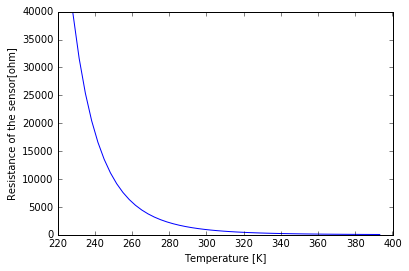

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp
%matplotlib inline

# Evaluate beta for this sensor 
T_0=273.15+20;
N=(1/273.15-1/293.15)-(1/298.15-1/293.15);
beta= log(3000/1000)/N;
R_0=1000/exp(beta*((1/298.15)-(1/293.15)));


## Results
print 'Beta for this sensor = %2.2f and the resistance of the sensor at temperature T0 is R_0 = = %2.2f' % (beta, R_0)

# Plot the sensor transfer function for the intended span.
# T= np.arange(start = -45, stop = 121, step = 1)+273.15;
T = np.linspace(-45,120)+273.15
R_T= R_O*np.exp(beta*(1/T-1/T_O));

# Plot
# plt.plot(T,R_T,T[45],R_T[45],'ro',T[45+25],R_T[45+25],'ro')
plt.plot(T,R_T)
plt.ylabel('Resistance of the sensor[ohm]')
plt.xlabel('Temperature [K]')
plt.show()



The plot shows the nonlinear behaviour of the sensor and the two points used for estimating the curve.

b. Approximate the transfer function as a straight line connecting the end points and calculate the maximum error expected as a percentage of full scale.


We approximate the transfer function as a straight line as $R(T)_{\text{linear}} = aT+b$ and compute the error.

The coefficients are a = -240.6320 and b = 94659.4583


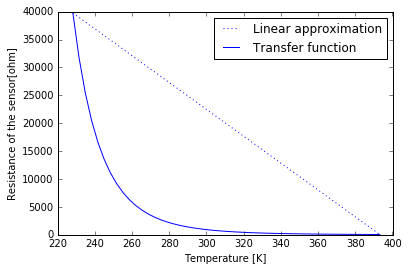

In [57]:
# Linear fit with just end points
a, b = np.polyfit(np.array([T[0],T[-1]]),np.array([R_T[0],R_T[-1]]),1)

print 'The coefficients are a = %2.4f and b = %2.4f' % (a, b)

# Linear approximation
R_T_linear = a*T+b

# Plot
plt.plot(T,R_T_linear,'b:',label='Linear approximation')
plt.plot(T,R_T,label='Transfer function')
plt.ylabel('Resistance of the sensor[ohm]')
plt.xlabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()

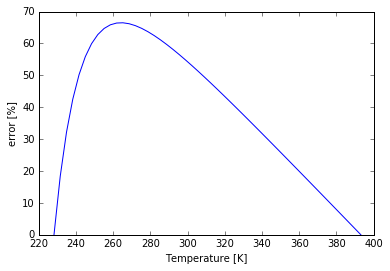

The maximum error expected as a percentage of full scale is = 66.49 %


In [58]:
# Output Full scale
FS = np.abs(np.max(R_T)-np.min(R_T))

error=np.abs(R_T-R_T_linear)/FS*100;

# error_X=np.abs(error_Y/a2);
plt.ylabel('error [%]')
plt.plot(T,error)
plt.xlabel('Temperature [K]')
plt.show()
print 'The maximum error expected as a percentage of full scale is = %2.2f %%' % (np.max(error))

Note how the error starts from zero reaches a maximum of 66.5 % and comes back down to zero at the other end point as expected.

c. Approximate the transfer function as a linear least squares approximation and calculate the maximum error expected as a percentage of full scale.

Mediante la funcion polyfit se realizo la aproximacion lineal de la funcion de transferencia del sensor. El maximo error con respecto a la temperatura es calculado a partir de la diferencia entre R(T) y la aproximacion obtenida, en el intervalo definido por los puntos de corte de la funciones. Esta diferencia dividida por la pendiente de la aproximacion me dará el error en el eje correspondiente a la temperatura en K:

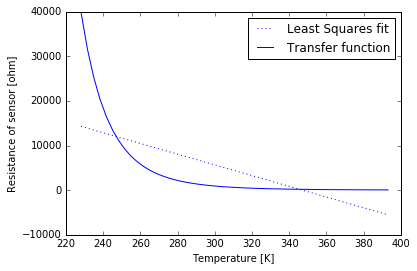

In [51]:
# polyfit computes the coefficients a and b of degree=1
a,b = np.polyfit(T,R_T,1)

# Linear approximation
R_T_lsq = a*T+b

# Plot
plt.plot(T,R_T_lsq,'b:',label='Least Squares fit')
plt.plot(T,R_T,label='Transfer function')
plt.ylabel('Resistance of sensor [ohm]')
plt.xlabel('Temperature [K]')
plt.legend(loc='upper right')
plt.show()

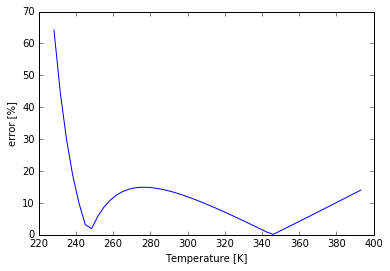

The maximum error expected as a percentage of full scale is = 64.2 %


In [49]:
error=np.abs(R_T-R_T_lsq)/FS*100;

# error_X=np.abs(error_Y/a2);
plt.ylabel('error [%]')
plt.plot(T,error)
plt.xlabel('Temperature [K]')
plt.show()
print 'The maximum error expected as a percentage of full scale is = %2.1f %%' % (np.max(error))